# 코드

In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# 한글 안 깨지게
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 폰트설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import matplotlib.font_manager as fm

# Assuming 'font_path.ttf' is the path to your NanumGothic font file
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

In [ ]:
df = pd.read_csv('/content/all_features.csv', parse_dates=['DATE'])

In [ ]:
dfq = pd.read_csv('/content/selected_features.csv', parse_dates=['DATE'])

In [ ]:
df.head(5)

,DATE,GDP(십억원),GNI(십억원),GDP_GROWTH(%),KOSPI,국고채(3년)(%),국고채(10년)(%),뉴스심리지수,경제심리지수,수출금액지수,...,미국PPI,본원 통화(달러 발행량),미국 소비자심리지수,금,은,원유,한국실업률,미국실업률,중국위안/달러,장단기금리차
0,2005-01-01,311097.1,318178.7,0.9,895.92,3.28,3.81,95.60,95.7,50.28,...,150.9,775.2,95.5,437.500000,6.807,43.450001,3.8,5.3,8.266501,0.53
1,2005-01-02,311097.1,318178.7,0.9,895.92,3.28,3.81,97.10,95.7,50.28,...,150.9,775.2,95.5,437.500000,6.807,43.450001,3.8,5.3,8.266501,0.53
2,2005-01-03,311097.1,318178.7,0.9,893.71,3.38,3.93,101.07,95.7,50.28,...,150.9,775.2,95.5,428.700012,6.477,42.119999,3.8,5.3,8.266501,0.55
3,2005-01-04,311097.1,318178.7,0.9,886.90,3.37,3.99,101.52,95.7,50.28,...,150.9,775.2,95.5,428.500000,6.427,43.910000,3.8,5.3,8.266501,0.62
4,2005-01-05,311097.1,318178.7,0.9,885.19,3.34,4.00,102.00,95.7,50.28,...,150.9,775.2,95.5,426.600006,6.512,43.389999,3.8,5.3,8.266501,0.66


In [ ]:
df['NASDAQ'] = pd.to_numeric(df['NASDAQ'].str.replace(',', ''), errors='coerce')

In [ ]:
dfq['NASDAQ'] = pd.to_numeric(dfq['NASDAQ'].str.replace(',', ''), errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7364 entries, 0 to 7363
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              7364 non-null   datetime64[ns]
 1   GDP(십억원)          7364 non-null   float64       
 2   GNI(십억원)          7364 non-null   float64       
 3   GDP_GROWTH(%)     7364 non-null   float64       
 4   KOSPI             7364 non-null   float64       
 5   국고채(3년)(%)        7364 non-null   float64       
 6   국고채(10년)(%)       7364 non-null   float64       
 7   뉴스심리지수            7364 non-null   float64       
 8   경제심리지수            7364 non-null   float64       
 9   수출금액지수            7364 non-null   float64       
 10  수입금액지수            7364 non-null   float64       
 11  수출물가지수(원화기준)      7364 non-null   float64       
 12  수출물가지수(계약통화기준)    7364 non-null   float64       
 13  수출물가지수(달러기준)      7364 non-null   float64       
 14  수입물가지수(원화기준)      7364 n

# Adaboost

In [ ]:
df.set_index('DATE', inplace=True)

# 파생 변수 만들기
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.dayofweek  # 월요일: 0, 일요일: 6
df['quarter'] = df.index.quarter
df['is_month_start'] = df.index.is_month_start.astype(int)
df['is_month_end'] = df.index.is_month_end.astype(int)

In [ ]:
X = df.drop(columns=['원/미국달러(매매기준율)'])
y = df['원/미국달러(매매기준율)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)


# 약한 학습기: 깊이가 3인 결정 트리 사용
base_model = DecisionTreeRegressor(max_depth=3)

# AdaBoost 모델 정의 (회귀 문제)
model = AdaBoostRegressor(estimator=base_model, n_estimators=50, learning_rate=1.0)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측
y_pred = model.predict(X_test)

# 모델 성능 평가 (예: MAE - 평균 절대 오차)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"평균 절대 오차 (MAE): {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 값: {r2:.4f}")
print(f'RMSE 값: {rmse:.4f}')


평균 절대 오차 (MAE): 141.05
R^2 값: -2.2525
RMSE 값: 174.2603


In [ ]:
dfq.set_index('DATE', inplace=True)

# 파생 변수 만들기
dfq['year'] = dfq.index.year
dfq['month'] = dfq.index.month
dfq['day'] = dfq.index.day
dfq['weekday'] = dfq.index.dayofweek  # 월요일: 0, 일요일: 6
dfq['quarter'] = dfq.index.quarter
dfq['is_month_start'] = dfq.index.is_month_start.astype(int)
dfq['is_month_end'] = dfq.index.is_month_end.astype(int)

In [ ]:
X = dfq.drop(columns=['원/미국달러(매매기준율)'])
y = dfq['원/미국달러(매매기준율)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)


# 약한 학습기: 깊이가 3인 결정 트리 사용
base_model = DecisionTreeRegressor(max_depth=3)

# AdaBoost 모델 정의 (회귀 문제)
model = AdaBoostRegressor(estimator=base_model, n_estimators=50, learning_rate=1.0)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대해 예측
y_pred = model.predict(X_test)

# 모델 성능 평가 (예: MAE - 평균 절대 오차)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"평균 절대 오차 (MAE): {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 값: {r2:.4f}")
print(f'RMSE 값: {rmse:.4f}')


평균 절대 오차 (MAE): 145.63
R^2 값: -2.2986
RMSE 값: 175.4916


# Prophet

In [ ]:
df1 = pd.read_csv('/content/all_features.csv', parse_dates=['DATE'])

In [ ]:
df2 = pd.read_csv('/content/selected_features.csv', parse_dates=['DATE'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw6cy0vtc/utsplr8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw6cy0vtc/plnm_lmg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13696', 'data', 'file=/tmp/tmpw6cy0vtc/utsplr8a.json', 'init=/tmp/tmpw6cy0vtc/plnm_lmg.json', 'output', 'file=/tmp/tmpw6cy0vtc/prophet_model0i7eru8t/prophet_model-20250429043144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 R² Score: -2.6745
📉 RMSE: 36.6329
📉 MAE: 31.7412


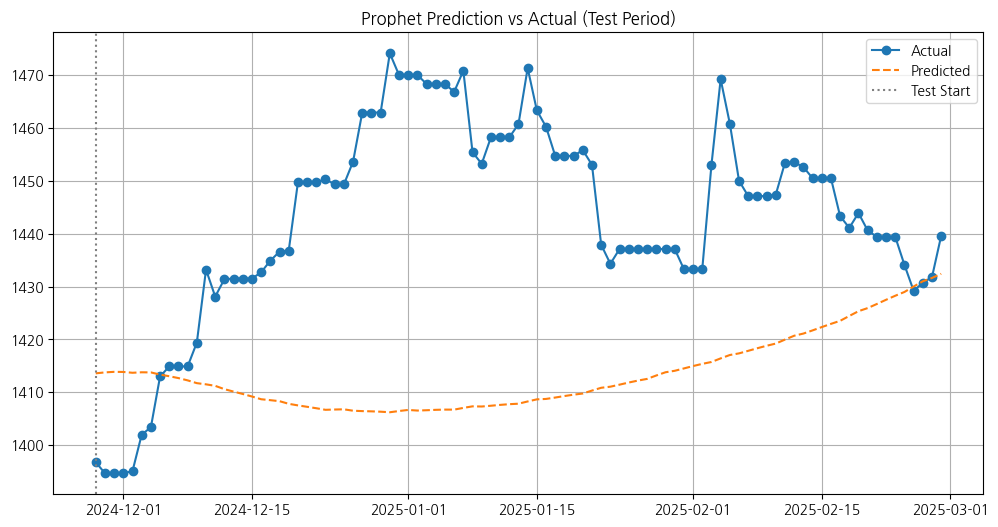

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

dfa = df1.rename(columns={'DATE': 'ds', '원/미국달러(매매기준율)': 'y'})  # Prophet 포맷 맞추기
dfa['ds'] = pd.to_datetime(dfa['ds'])

# 2. Train/Test 분할 (최근 6개월을 Test로)
last_date = dfa['ds'].max()
test_start = last_date - pd.DateOffset(months=3)

train_df = dfa[dfa['ds'] < test_start]
test_df = dfa[dfa['ds'] >= test_start]

# 3. Prophet 모델 학습
model = Prophet()
model.fit(train_df)

# 4. 예측용 future 데이터 생성 (Train + Test 날짜 포함)
future = dfa[['ds']]  # 전체 기간 예측
forecast = model.predict(future)

# 5. 테스트 구간 추출
forecast_test = forecast[forecast['ds'] >= test_start]
actual = test_df['y'].values
predicted = forecast_test['yhat'].values

# 6. 평가 지표
r2 = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f'📊 R² Score: {r2:.4f}')
print(f'📉 RMSE: {rmse:.4f}')
print(f'📉 MAE: {mae:.4f}')

# 7. 시각화
plt.figure(figsize=(12,6))
plt.plot(test_df['ds'], actual, label='Actual', marker='o')
plt.plot(forecast_test['ds'], predicted, label='Predicted', linestyle='--')
plt.axvline(test_start, color='gray', linestyle=':', label='Test Start')
plt.title('Prophet Prediction vs Actual (Test Period)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 1. 전체 데이터 길이
total_len = len(dfa)

# 2. 70% 지점 계산
split_index = int(total_len * 0.7)

# 3. 시계열 순서대로 분리
train_df = dfa.iloc[:split_index]
test_df = dfa.iloc[split_index:]


In [ ]:
# 모델 학습
model = Prophet()
model.fit(train_df)

# 전체 예측 (train + test 모두 포함)
future = dfa[['ds']]
forecast = model.predict(future)

# 예측 결과 중 test 시점 이후만 추출
forecast_test = forecast.iloc[split_index:]
actual = test_df['y'].values
predicted = forecast_test['yhat'].values

# 평가
r2 = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f'📊 R² Score: {r2:.4f}')
print(f'📉 RMSE: {rmse:.4f}')
print(f'📉 MAE: {mae:.4f}')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpauxbr7we/jhajbshi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpauxbr7we/0uwsohon.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88747', 'data', 'file=/tmp/tmpauxbr7we/jhajbshi.json', 'init=/tmp/tmpauxbr7we/0uwsohon.json', 'output', 'file=/tmp/tmpauxbr7we/prophet_modelz9xrunqx/prophet_model-20250429010720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:07:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:07:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 R² Score: -6.8398
📉 RMSE: 270.5457
📉 MAE: 234.4700


월별 성능 지표

In [ ]:
forecast_test = forecast[forecast['ds'] >= test_start]
merged = test_df[['ds', 'y']].merge(forecast_test[['ds', 'yhat']], on='ds')

# 5. 월별 그룹 추가
merged['month'] = merged['ds'].dt.to_period('M')

# 6. 월별 성능 지표 계산
results = []
for month, group in merged.groupby('month'):
    r2 = r2_score(group['y'], group['yhat'])
    rmse = np.sqrt(mean_squared_error(group['y'], group['yhat']))
    mae = mean_absolute_error(group['y'], group['yhat'])
    results.append({
        'month': str(month),
        'R2': round(r2, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

results_df = pd.DataFrame(results)
print(results_df)

     month        R2     RMSE      MAE
0  2024-08 -854.0367  59.9396  59.9115
1  2024-09 -149.4053  64.2034  63.7017
2  2024-10   -5.3401  60.8574  55.9426
3  2024-11   -3.1717  19.7102  17.7645
4  2024-12   -1.3039  32.3494  27.1754
5  2025-01  -10.4480  43.6947  41.1183
6  2025-02   -5.6448  23.9401  20.5218


In [ ]:
columns = df.columns.tolist()
print(columns)

['GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)', '국고채(10년)(%)', '뉴스심리지수', '경제심리지수', '수출금액지수', '수입금액지수', '수출물가지수(원화기준)', '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)', '수입물가지수(계약통화기준)', '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리', 'CD(91일)', '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI', '원/미국달러(매매기준율)', '일본엔/달러', '달러/유로', '미국기준금리', 'NASDAQ', '미국CPI', '미국PPI', '본원 통화(달러 발행량)', '미국 소비자심리지수', '금', '은', '원유', '한국실업률', '미국실업률', '중국위안/달러', '장단기금리차', 'year', 'month', 'day', 'weekday', 'quarter', 'is_month_start', 'is_month_end']


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw6cy0vtc/fm4ljgr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw6cy0vtc/ubmb9yj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4881', 'data', 'file=/tmp/tmpw6cy0vtc/fm4ljgr2.json', 'init=/tmp/tmpw6cy0vtc/ubmb9yj6.json', 'output', 'file=/tmp/tmpw6cy0vtc/prophet_model0kq5jj0w/prophet_model-20250429043213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:32:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:32:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 R² Score: 0.9066
📉 RMSE: 14.7604
📉 MAE: 11.8702


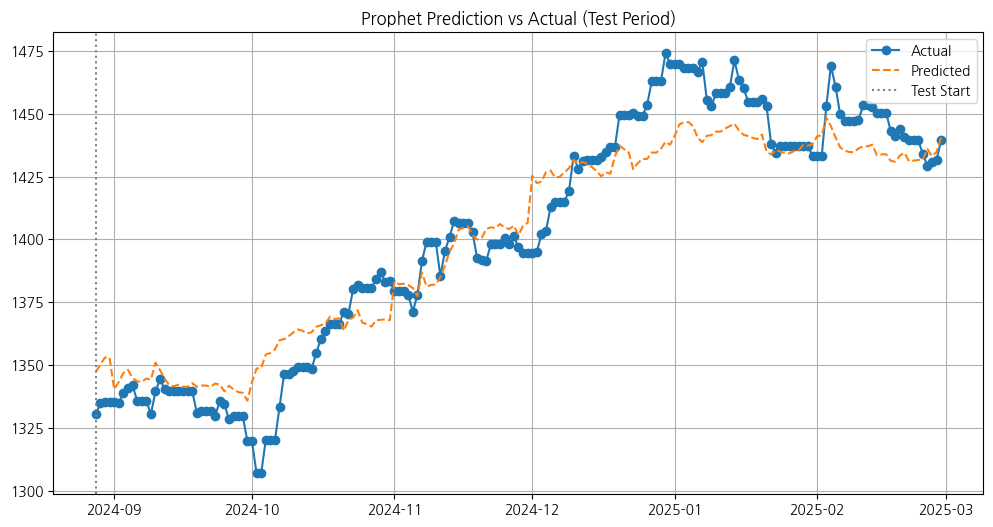

In [ ]:
dfa = df1.rename(columns={'DATE': 'ds', '원/미국달러(매매기준율)': 'y'})  # Prophet 포맷 맞추기
dfa['ds'] = pd.to_datetime(dfa['ds'])

dfa['NASDAQ'] = pd.to_numeric(df1['NASDAQ'].str.replace(',', ''), errors='coerce')

# 예: 외부 변수 10개 이상
regressors = ['GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)', '국고채(10년)(%)', '뉴스심리지수', '경제심리지수',
              '수출금액지수', '수입금액지수', '수출물가지수(원화기준)', '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)',
              '수입물가지수(계약통화기준)', '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리', 'CD(91일)',
              '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI', '일본엔/달러', '달러/유로', '미국기준금리', 'NASDAQ',
              '미국CPI', '미국PPI', '본원 통화(달러 발행량)', '미국 소비자심리지수', '금', '은', '원유', '한국실업률', '미국실업률', '중국위안/달러', '장단기금리차']

# 1. Prophet 모델 초기화
model = Prophet()

# 외부 변수 반복 추가 (model fitting 전에 추가)
for reg in regressors:
    model.add_regressor(reg)

# 2. Train/Test 분할 (최근 6개월을 Test로)
last_date = dfa['ds'].max()
test_start = last_date - pd.DateOffset(months=6)

train_df = dfa[dfa['ds'] < test_start]
test_df = dfa[dfa['ds'] >= test_start]

# 3. Prophet 모델 학습 (regressor 추가 후 fitting)
model.fit(train_df)

# 4. 예측용 future 데이터 생성 (Train + Test 날짜 포함)
future = dfa[['ds'] + [reg for reg in regressors if reg in dfa.columns]]  # 모든 변수 포함, dfa에 있는 regressors만 사용
forecast = model.predict(future)

# 5. 테스트 구간 추출
forecast_test = forecast[forecast['ds'] >= test_start]
actual = test_df['y'].values
predicted = forecast_test['yhat'].values

# 6. 평가 지표
r2 = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f'📊 R² Score: {r2:.4f}')
print(f'📉 RMSE: {rmse:.4f}')
print(f'📉 MAE: {mae:.4f}')

# 7. 시각화
plt.figure(figsize=(12,6))
plt.plot(test_df['ds'], actual, label='Actual', marker='o')
plt.plot(forecast_test['ds'], predicted, label='Predicted', linestyle='--')
plt.axvline(test_start, color='gray', linestyle=':', label='Test Start')
plt.title('Prophet Prediction vs Actual (Test Period)')
plt.legend()
plt.grid(True)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw6cy0vtc/65edxk28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw6cy0vtc/7ca6ddt2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39349', 'data', 'file=/tmp/tmpw6cy0vtc/65edxk28.json', 'init=/tmp/tmpw6cy0vtc/7ca6ddt2.json', 'output', 'file=/tmp/tmpw6cy0vtc/prophet_model7kwwqzar/prophet_model-20250429043355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:34:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 36 forecasts with cutoffs between 2007-06-03 00:00:00 and 2024-09-01 00:00:00
INFO:prophet:Applying in parallel with <conc

  horizon         mse       rmse        mae      mape     mdape     smape  \
0 18 days  701.661836  26.488900  15.199442  0.012641  0.008048  0.012727   
1 19 days  700.221185  26.461693  15.243883  0.012695  0.008168  0.012781   
2 20 days  704.344583  26.539491  15.469069  0.012902  0.008496  0.012988   
3 21 days  710.350885  26.652409  15.729943  0.013151  0.008707  0.013239   
4 22 days  722.014567  26.870329  16.050693  0.013454  0.009023  0.013543   

   coverage  
0  0.808642  
1  0.807099  
2  0.797840  
3  0.787037  
4  0.773148  


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


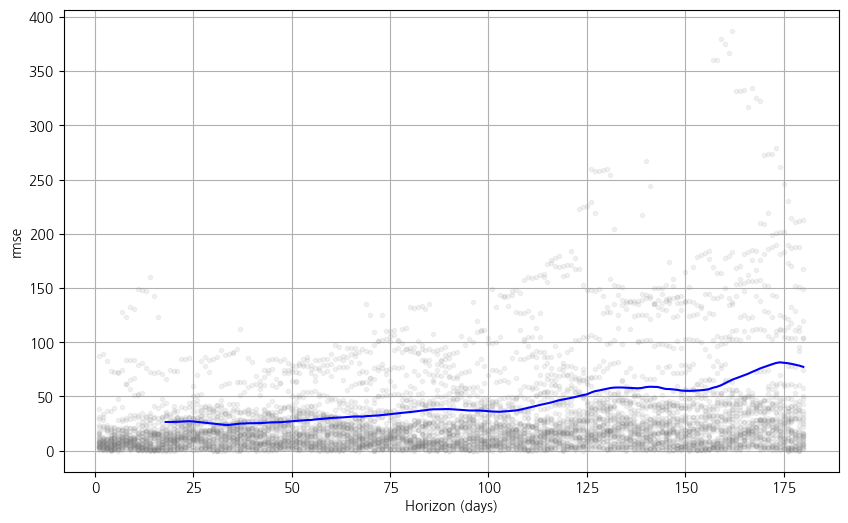

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Prophet 모델 정의 및 외부 변수 추가
model = Prophet()
for reg in regressors:
    model.add_regressor(reg)

# 전체 데이터 학습 (regressor 포함)
model.fit(dfa)

# 시계열 교차검증 수행
df_cv = cross_validation(
    model,
    initial='730 days',   # 훈련 초기 기간 (약 2년)
    period='180 days',    # fold 간격
    horizon='180 days',   # 예측 기간
    parallel="processes"  # 병렬 처리 (가능한 경우)
)

# 성능 평가
df_p = performance_metrics(df_cv)
print(df_p.head())

# 시각화
fig = plot_cross_validation_metric(df_cv, metric='rmse')


In [ ]:
from prophet.diagnostics import performance_metrics

# cross-validation 결과로부터 성능 지표 계산
df_p = performance_metrics(df_cv_long)

# 전체 horizon 구간 평균 (fold 합산 평균)
mean_metrics = df_p.mean(numeric_only=True)
print(mean_metrics)


mse         1001.748094
rmse          30.339066
mae           21.572941
mape           0.018603
mdape          0.013884
smape          0.018674
coverage       0.591189
dtype: float64


In [ ]:
from sklearn.metrics import r2_score

# cross-validation 결과: df_cv에는 'y' (실제값), 'yhat' (예측값) 포함됨
r2 = r2_score(df_cv['y'], df_cv['yhat'])
print(f'R² score (전체 fold 평균 기준): {r2:.4f}')

R² score (전체 fold 평균 기준): 0.8220


In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,701.661836,26.488900,15.199442,0.012641,0.008048,0.012727,0.808642
1,19 days,700.221185,26.461693,15.243883,0.012695,0.008168,0.012781,0.807099
2,20 days,704.344583,26.539491,15.469069,0.012902,0.008496,0.012988,0.797840
3,21 days,710.350885,26.652409,15.729943,0.013151,0.008707,0.013239,0.787037
4,22 days,722.014567,26.870329,16.050693,0.013454,0.009023,0.013543,0.773148
...,...,...,...,...,...,...,...,...
158,176 days,6514.703852,80.713715,48.299350,0.041110,0.022842,0.041060,0.439815
159,177 days,6409.870847,80.061669,48.186498,0.041021,0.022955,0.041004,0.438272
160,178 days,6285.273784,79.279719,47.956816,0.040842,0.022955,0.040848,0.441358
161,179 days,6151.149756,78.429266,47.624953,0.040575,0.023040,0.040598,0.445988


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_u95sfv/vzzujci7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_u95sfv/tf6b0zdz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85231', 'data', 'file=/tmp/tmpq_u95sfv/vzzujci7.json', 'init=/tmp/tmpq_u95sfv/tf6b0zdz.json', 'output', 'file=/tmp/tmpq_u95sfv/prophet_modeloqdichzs/prophet_model-20250424021344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:13:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:13:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 R² Score: -0.3490
📉 RMSE: 112.2243
📉 MAE: 100.2372


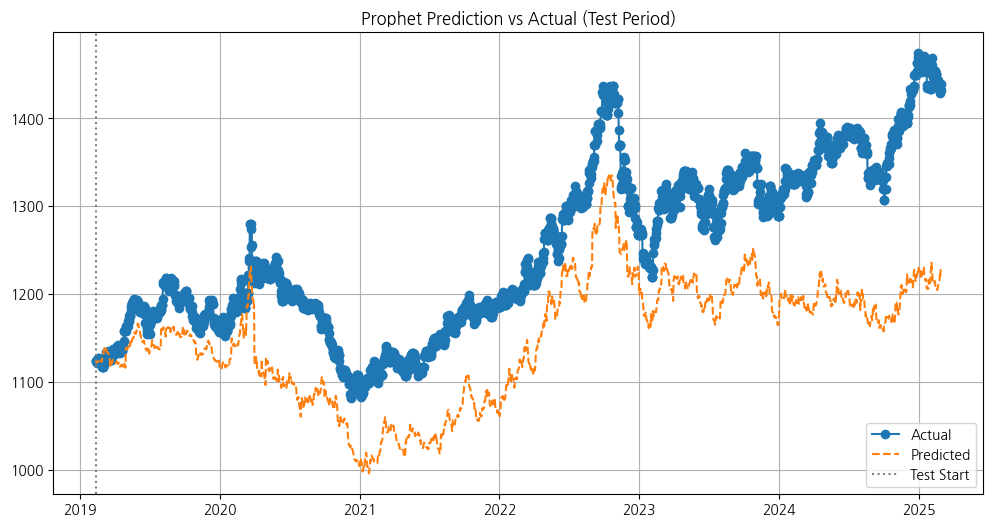

In [ ]:
dfa = df1.rename(columns={'DATE': 'ds', '원/미국달러(매매기준율)': 'y'})  # Prophet 포맷 맞추기
dfa['ds'] = pd.to_datetime(dfa['ds'])

dfa['NASDAQ'] = pd.to_numeric(df1['NASDAQ'].str.replace(',', ''), errors='coerce')

# 예: 외부 변수 10개 이상
regressors = ['GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)', '국고채(10년)(%)', '뉴스심리지수', '경제심리지수',
              '수출금액지수', '수입금액지수', '수출물가지수(원화기준)', '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)',
              '수입물가지수(계약통화기준)', '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리', 'CD(91일)',
              '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI', '일본엔/달러', '달러/유로', '미국기준금리', 'NASDAQ',
              '미국CPI', '미국PPI', '본원 통화(달러 발행량)', '미국 소비자심리지수', '금', '은', '원유', '한국실업률', '미국실업률', '중국위안/달러', '장단기금리차']

# 1. Prophet 모델 초기화
model = Prophet()

# 외부 변수 반복 추가 (model fitting 전에 추가)
for reg in regressors:
    model.add_regressor(reg)

# 2. 7:3 분할
split_index = int(len(dfa) * 0.7)

train_df = dfa.iloc[:split_index]
test_df = dfa.iloc[split_index:]

test_start = test_df['ds'].iloc[0]

# 3. Prophet 모델 학습 (regressor 추가 후 fitting)
model.fit(train_df)

# 4. 예측용 future 데이터 생성 (Train + Test 날짜 포함)
future = dfa[['ds'] + [reg for reg in regressors if reg in dfa.columns]]  # 모든 변수 포함, dfa에 있는 regressors만 사용
forecast = model.predict(future)

# 5. 테스트 구간 추출
forecast_test = forecast[forecast['ds'] >= test_start]
actual = test_df['y'].values
predicted = forecast_test['yhat'].values

# 6. 평가 지표
r2 = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f'📊 R² Score: {r2:.4f}')
print(f'📉 RMSE: {rmse:.4f}')
print(f'📉 MAE: {mae:.4f}')

# 7. 시각화
plt.figure(figsize=(12,6))
plt.plot(test_df['ds'], actual, label='Actual', marker='o')
plt.plot(forecast_test['ds'], predicted, label='Predicted', linestyle='--')
plt.axvline(test_start, color='gray', linestyle=':', label='Test Start')
plt.title('Prophet Prediction vs Actual (Test Period)')
plt.legend()
plt.grid(True)
plt.show()

변수 중요도

In [ ]:
coefs = model.params['beta'][0]
for reg, coef in zip(regressors, coefs):
    print(f'{reg}: {coef:.4f}')

GDP(십억원): -0.0000
GNI(십억원): -0.0006
GDP_GROWTH(%): 0.0006
KOSPI: -0.0002
국고채(3년)(%): 0.0001
국고채(10년)(%): 0.0005
뉴스심리지수: -0.0004
경제심리지수: 0.0004
수출금액지수: -0.0004
수입금액지수: -0.0000
수출물가지수(원화기준): 0.0003
수출물가지수(계약통화기준): -0.0002
수출물가지수(달러기준): 0.0003
수입물가지수(원화기준): -0.0007
수입물가지수(계약통화기준): 0.0014
수입물가지수(달러기준): -0.0003
대외채권: -0.0000
대외채무: -0.0007
순대외채권: 0.0003
외환보유액(천달러): 0.0002
기준금리: 0.0001
CD(91일): 0.0001
무담보콜금리(1일, 전체거래): -0.0000
경상수지(계절조정): 0.0000
CPI: 0.0001
PPI: -0.0000
일본엔/달러: 0.0093
달러/유로: -0.0186
미국기준금리: 0.0008
NASDAQ: -0.0062
미국CPI: 0.0032
미국PPI: 0.0038
본원 통화(달러 발행량): -0.0029
미국 소비자심리지수: 0.0025
금: 0.0025
은: -0.0064
원유: 0.1146
한국실업률: -0.3562
미국실업률: 0.2637
중국위안/달러: -0.0821
장단기금리차: 0.0741


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_u95sfv/_1ddieth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_u95sfv/bof9wh1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24625', 'data', 'file=/tmp/tmpq_u95sfv/_1ddieth.json', 'init=/tmp/tmpq_u95sfv/bof9wh1v.json', 'output', 'file=/tmp/tmpq_u95sfv/prophet_modelposrx_v0/prophet_model-20250424014052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:40:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:40:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 R² Score: -2.6745
📉 RMSE: 36.6329
📉 MAE: 31.7412


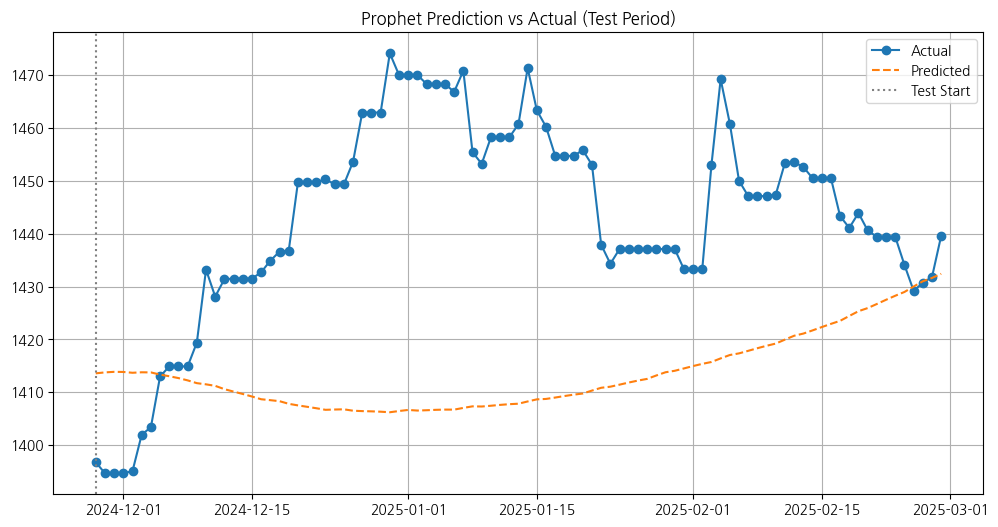

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

dfb = df2.rename(columns={'DATE': 'ds', '원/미국달러(매매기준율)': 'y'})  # Prophet 포맷 맞추기
dfb['ds'] = pd.to_datetime(dfb['ds'])

# 2. Train/Test 분할 (최근 3개월을 Test로)
last_date = dfb['ds'].max()
test_start = last_date - pd.DateOffset(months=3)

train_dfb = dfb[dfb['ds'] < test_start]
test_dfb = dfb[dfb['ds'] >= test_start]

# 3. Prophet 모델 학습
model = Prophet()
model.fit(train_dfb)

# 4. 예측용 future 데이터 생성 (Train + Test 날짜 포함)
future = dfb[['ds']]  # 전체 기간 예측
forecast = model.predict(future)

# 5. 테스트 구간 추출
forecast_test = forecast[forecast['ds'] >= test_start]
actual = test_dfb['y'].values
predicted = forecast_test['yhat'].values

# 6. 평가 지표
r2 = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f'📊 R² Score: {r2:.4f}')
print(f'📉 RMSE: {rmse:.4f}')
print(f'📉 MAE: {mae:.4f}')

# 7. 시각화
plt.figure(figsize=(12,6))
plt.plot(test_dfb['ds'], actual, label='Actual', marker='o')
plt.plot(forecast_test['ds'], predicted, label='Predicted', linestyle='--')
plt.axvline(test_start, color='gray', linestyle=':', label='Test Start')
plt.title('Prophet Prediction vs Actual (Test Period)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
columns = df2.columns.tolist()
print(columns)

['DATE', 'KOSPI', '기준금리', '수출물가지수(원화기준)', '수입물가지수(원화기준)', 'PPI', '한국실업률', '금', '은', '원유', '중국위안/달러', 'NASDAQ', '외환보유액(천달러)', '미국PPI', '뉴스심리지수', '대외채무', '본원 통화(달러 발행량)', 'CPI', '장단기금리차', 'GDP_GROWTH(%)', '원/미국달러(매매기준율)']


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_u95sfv/yt_x8hg4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_u95sfv/_x74kka4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34763', 'data', 'file=/tmp/tmpq_u95sfv/yt_x8hg4.json', 'init=/tmp/tmpq_u95sfv/_x74kka4.json', 'output', 'file=/tmp/tmpq_u95sfv/prophet_modelsk0moc1f/prophet_model-20250424020857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 R² Score: -2.9380
📉 RMSE: 37.9239
📉 MAE: 34.4689


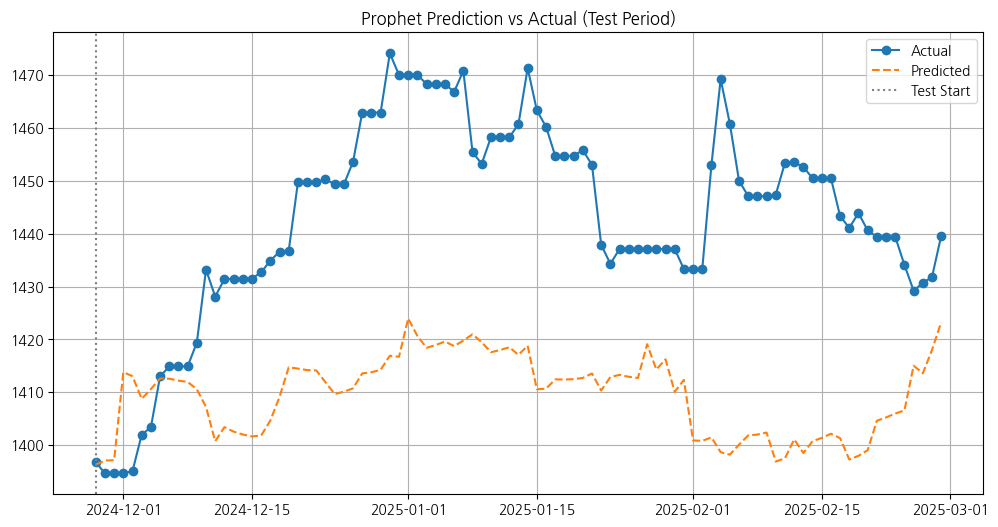

In [ ]:
dfb = df2.rename(columns={'DATE': 'ds', '원/미국달러(매매기준율)': 'y'})  # Prophet 포맷 맞추기
dfb['ds'] = pd.to_datetime(dfb['ds'])

dfb['NASDAQ'] = pd.to_numeric(df2['NASDAQ'].str.replace(',', ''), errors='coerce')

# 예: 외부 변수 10개 이상
regressors = ['KOSPI', '기준금리', '수출물가지수(원화기준)', '수입물가지수(원화기준)', 'PPI', '한국실업률',
'금', '은', '원유', '중국위안/달러', 'NASDAQ', '외환보유액(천달러)', '미국PPI', '뉴스심리지수', '대외채무',
'본원 통화(달러 발행량)', 'CPI', '장단기금리차', 'GDP_GROWTH(%)']

# 1. Prophet 모델 초기화
model = Prophet()

# 외부 변수 반복 추가 (model fitting 전에 추가)
for reg in regressors:
    model.add_regressor(reg)

# 2. Train/Test 분할 (최근 3개월을 Test로)
last_date = dfb['ds'].max()
test_start = last_date - pd.DateOffset(months=3)

train_dfb = dfb[dfb['ds'] < test_start]
test_dfb = dfb[dfb['ds'] >= test_start]

# 3. Prophet 모델 학습 (regressor 추가 후 fitting)
model.fit(train_dfb)

# 4. 예측용 future 데이터 생성 (Train + Test 날짜 포함)
future = dfb[['ds'] + [reg for reg in regressors if reg in dfa.columns]]  # 모든 변수 포함, dfa에 있는 regressors만 사용
forecast = model.predict(future)

# 5. 테스트 구간 추출
forecast_test = forecast[forecast['ds'] >= test_start]
actual = test_dfb['y'].values
predicted = forecast_test['yhat'].values

# 6. 평가 지표
r2 = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f'📊 R² Score: {r2:.4f}')
print(f'📉 RMSE: {rmse:.4f}')
print(f'📉 MAE: {mae:.4f}')

# 7. 시각화
plt.figure(figsize=(12,6))
plt.plot(test_dfb['ds'], actual, label='Actual', marker='o')
plt.plot(forecast_test['ds'], predicted, label='Predicted', linestyle='--')
plt.axvline(test_start, color='gray', linestyle=':', label='Test Start')
plt.title('Prophet Prediction vs Actual (Test Period)')
plt.legend()
plt.grid(True)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_u95sfv/avzw89wr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq_u95sfv/13ezwakg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2767', 'data', 'file=/tmp/tmpq_u95sfv/avzw89wr.json', 'init=/tmp/tmpq_u95sfv/13ezwakg.json', 'output', 'file=/tmp/tmpq_u95sfv/prophet_modelocpxlkyw/prophet_model-20250424021813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


📊 R² Score: -8.2842
📉 RMSE: 294.4161
📉 MAE: 250.4986


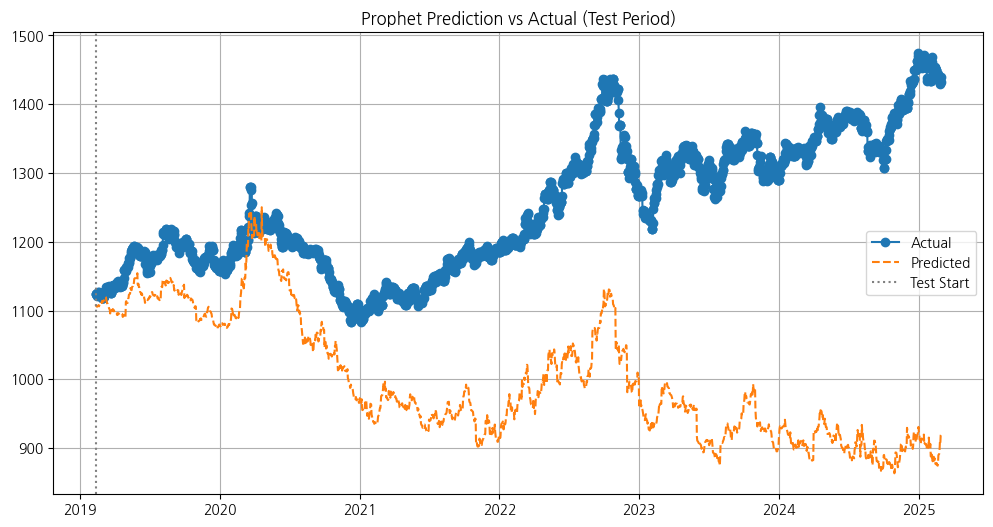

In [ ]:
dfb = df2.rename(columns={'DATE': 'ds', '원/미국달러(매매기준율)': 'y'})  # Prophet 포맷 맞추기
dfb['ds'] = pd.to_datetime(dfb['ds'])

dfb['NASDAQ'] = pd.to_numeric(df2['NASDAQ'].str.replace(',', ''), errors='coerce')

# 예: 외부 변수 10개 이상
regressors = ['KOSPI', '기준금리', '수출물가지수(원화기준)', '수입물가지수(원화기준)', 'PPI', '한국실업률',
'금', '은', '원유', '중국위안/달러', 'NASDAQ', '외환보유액(천달러)', '미국PPI', '뉴스심리지수', '대외채무',
'본원 통화(달러 발행량)', 'CPI', '장단기금리차', 'GDP_GROWTH(%)']

# 1. Prophet 모델 초기화
model = Prophet()

# 외부 변수 반복 추가 (model fitting 전에 추가)
for reg in regressors:
    model.add_regressor(reg)

# 2. 7:3 분할
split_index = int(len(dfb) * 0.7)

train_dfb = dfb.iloc[:split_index]
test_dfb = dfb.iloc[split_index:]

test_start = test_dfb['ds'].iloc[0]

# 3. Prophet 모델 학습 (regressor 추가 후 fitting)
model.fit(train_dfb)

# 4. 예측용 future 데이터 생성 (Train + Test 날짜 포함)
# Change here: use dfb.columns to make sure future has same columns as dfb
future = dfb[['ds'] + [reg for reg in regressors if reg in dfb.columns]]
forecast = model.predict(future)

# 5. 테스트 구간 추출
forecast_test = forecast[forecast['ds'] >= test_start]
# Make sure actual and predicted align by using the index from forecast_test
actual = test_dfb['y'].values
predicted = forecast_test['yhat'].loc[forecast_test['ds'].isin(test_dfb['ds'])].values

# 6. 평가 지표
r2 = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f'📊 R² Score: {r2:.4f}')
print(f'📉 RMSE: {rmse:.4f}')
print(f'📉 MAE: {mae:.4f}')

# 7. 시각화
plt.figure(figsize=(12,6))
plt.plot(test_dfb['ds'], actual, label='Actual', marker='o')
plt.plot(forecast_test['ds'], predicted, label='Predicted', linestyle='--')
plt.axvline(test_start, color='gray', linestyle=':', label='Test Start')
plt.title('Prophet Prediction vs Actual (Test Period)')
plt.legend()
plt.grid(True)
plt.show()

미래 예측

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprkvxg46f/uq32hlj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprkvxg46f/2fcxao7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75244', 'data', 'file=/tmp/tmprkvxg46f/uq32hlj7.json', 'init=/tmp/tmprkvxg46f/2fcxao7h.json', 'output', 'file=/tmp/tmprkvxg46f/prophet_modelypz1tdb0/prophet_model-20250424045908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:59:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
WARNING - (py.warnings._showwarnmsg) - <ipython-input-7-03dec9116db1>:29: FutureWarning: Series.fillna with 'method' is deprecated and will ra

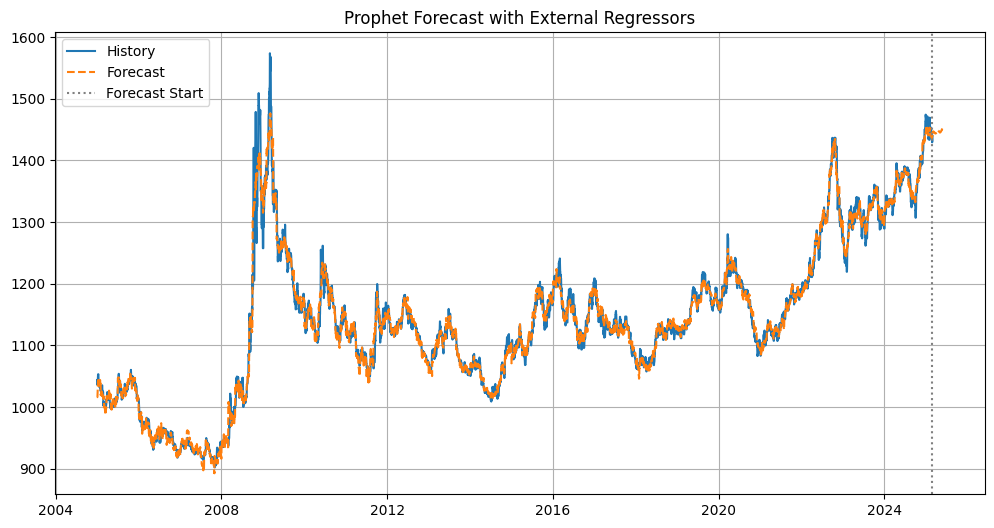

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np

regressors = ['GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)', '국고채(10년)(%)', '뉴스심리지수', '경제심리지수',
              '수출금액지수', '수입금액지수', '수출물가지수(원화기준)', '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)',
              '수입물가지수(계약통화기준)', '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리', 'CD(91일)',
              '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI', '일본엔/달러', '달러/유로', '미국기준금리', 'NASDAQ',
              '미국CPI', '미국PPI', '본원 통화(달러 발행량)', '미국 소비자심리지수', '금', '은', '원유', '한국실업률', '미국실업률', '중국위안/달러', '장단기금리차']
# 1. 기본 Prophet 설정 + 외부 변수 추가
model = Prophet()
for reg in regressors:  # 위에서 정리한 외부 변수 리스트
    model.add_regressor(reg)

# 2. 모델 학습
model.fit(dfa)

# 3. 미래 날짜 생성 (예: 90일 뒤까지 예측)
future = model.make_future_dataframe(periods=90)

# 4. 외부 변수 미래값 병합 (선형 보간 + 최근값 유지)
# 과거 외부 변수만 존재하는 데이터프레임에서 가져와 병합
external = dfa[['ds'] + regressors]
future = future.merge(external, on='ds', how='left')

# 5. 외부 변수 보간 (선형 보간 + 마지막값 유지)
for reg in regressors:
    future[reg] = future[reg].interpolate(method='linear')
    future[reg] = future[reg].fillna(method='ffill')

# 6. 미래 예측 수행
forecast = model.predict(future)

# 7. 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(dfa['ds'], dfa['y'], label='History')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--')
plt.axvline(dfa['ds'].max(), color='gray', linestyle=':', label='Forecast Start')
plt.title('Prophet Forecast with External Regressors')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 8. 예측 결과 테이블 출력 (미래만)
forecast_future = forecast[forecast['ds'] > dfa['ds'].max()][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("\n📈 미래 3개월 예측 결과 미리보기:")
print(forecast_future.head(10))


📈 미래 3개월 예측 결과 미리보기:
             ds         yhat   yhat_lower   yhat_upper
7364 2025-03-01  1445.427310  1427.675733  1464.797862
7365 2025-03-02  1445.755079  1428.036602  1462.825616
7366 2025-03-03  1445.689761  1427.462806  1464.463087
7367 2025-03-04  1446.088984  1426.405991  1463.743592
7368 2025-03-05  1446.416429  1428.047696  1464.632825
7369 2025-03-06  1446.595912  1428.031682  1463.855431
7370 2025-03-07  1446.861397  1428.849725  1464.292334
7371 2025-03-08  1446.612069  1429.535687  1465.104418
7372 2025-03-09  1446.604808  1427.240299  1465.350688
7373 2025-03-10  1446.206501  1426.926455  1463.809367


In [ ]:
forecast_future.to_csv('forecast_next_3_months.csv', index=False)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-10-abefa832816f>:22: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

  plt.tight_layout()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-10-abefa832816f>:22: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

  plt.tight_layout()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-10-abefa832816f>:22: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

  plt.tight_layout()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-10-abefa832816f>:22: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

  plt.tight_layout()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-10-abefa832816f>:22: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



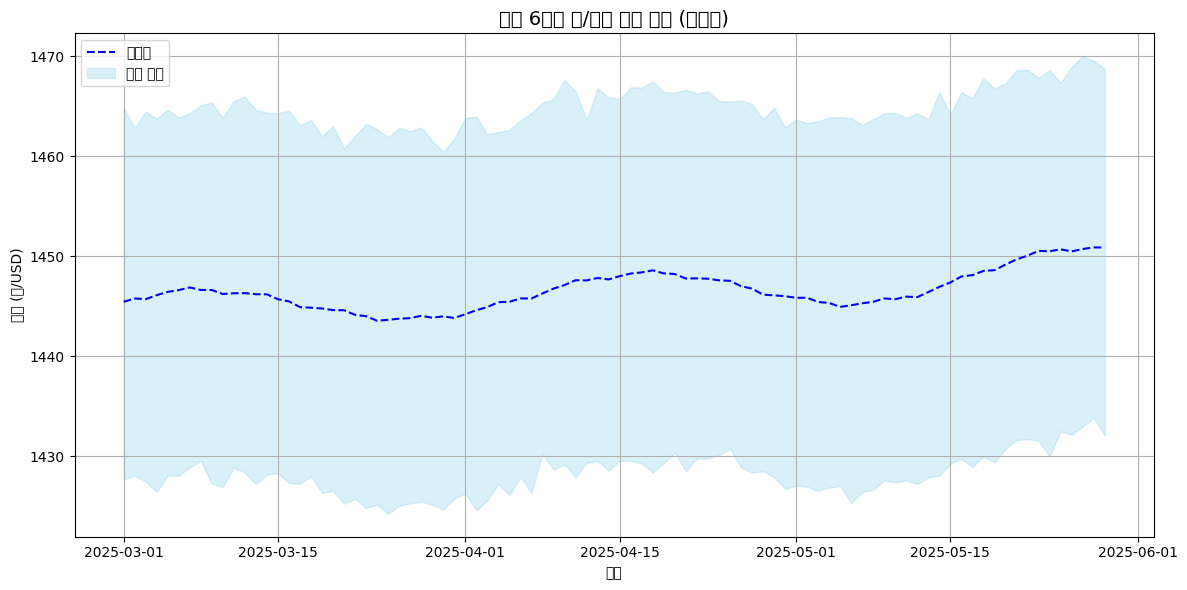

In [ ]:
import matplotlib.pyplot as plt

# 1. 미래 예측 결과만 필터링
forecast_future = forecast[forecast['ds'] > dfa['ds'].max()]

# 2. 시각화
plt.figure(figsize=(12, 6))
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='예측값', color='blue', linestyle='--')

# 신뢰 구간 음영 추가
plt.fill_between(forecast_future['ds'],
                 forecast_future['yhat_lower'],
                 forecast_future['yhat_upper'],
                 color='skyblue', alpha=0.3, label='신뢰 구간')

# 시각화 옵션
plt.title('향후 6개월 원/달러 환율 예측 (미래만)', fontsize=14)
plt.xlabel('날짜')
plt.ylabel('환율 (원/USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


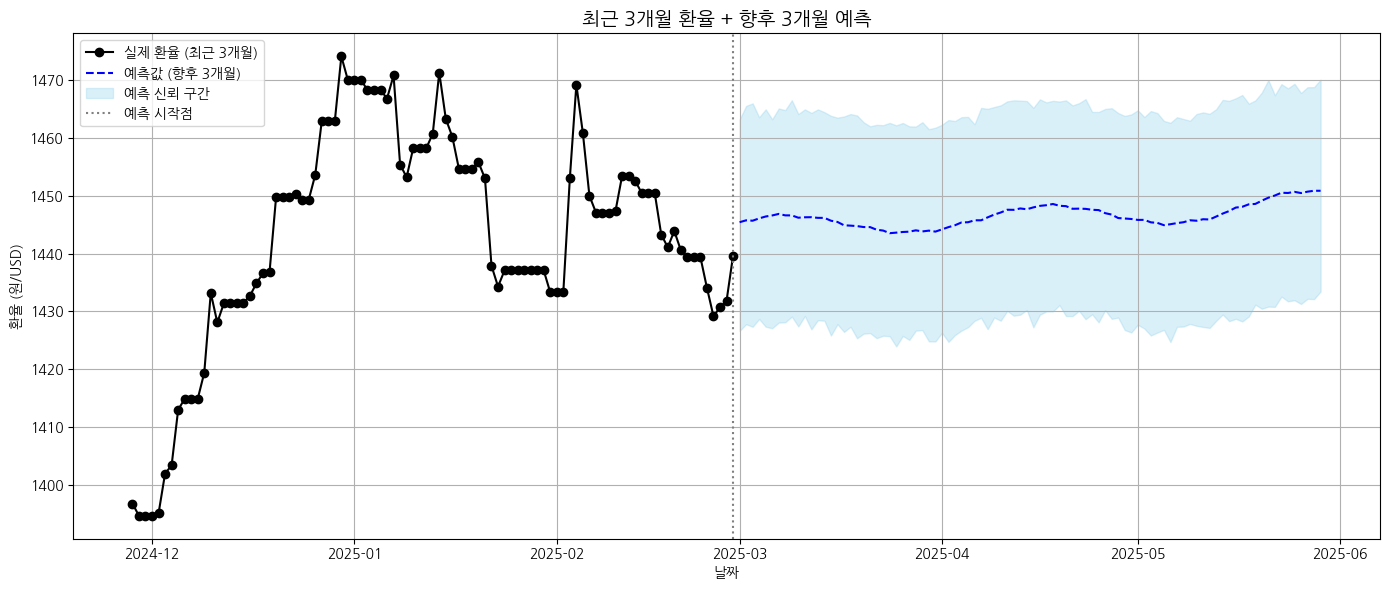

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 기준 날짜 설정
last_date = dfa['ds'].max()
three_months_ago = last_date - pd.DateOffset(months=3)

# 2. 과거 3개월 실제값
past_3m = dfa[(dfa['ds'] >= three_months_ago)][['ds', 'y']]

# 3. 미래 예측값 (last_date 이후)
future = forecast[forecast['ds'] > last_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# 4. 시각화
plt.figure(figsize=(14, 6))

# 실제값
plt.plot(past_3m['ds'], past_3m['y'], label='실제 환율 (최근 3개월)', color='black', marker='o')

# 예측값
plt.plot(future['ds'], future['yhat'], label='예측값 (향후 3개월)', color='blue', linestyle='--')

# 신뢰 구간
plt.fill_between(future['ds'], future['yhat_lower'], future['yhat_upper'],
                 color='skyblue', alpha=0.3, label='예측 신뢰 구간')

# 스타일 설정
plt.axvline(last_date, color='gray', linestyle=':', label='예측 시작점')
plt.title('최근 3개월 환율 + 향후 3개월 예측', fontsize=14)
plt.xlabel('날짜')
plt.ylabel('환율 (원/USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
